In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
def load_object(filename):
    with open(filename, 'rb') as inp:
        return pickle.load(inp)

In [2]:
percentages = [0, 25, 50, 75, 100]
train_times_fgsm_housing = []
train_times_fgsm_temperature = []
train_times_pgd_housing = []
train_times_pgd_temperature = []

for p in percentages:
    model_training_time_name = f"model_housing_fgsm_{p}"
    train_times_fgsm_housing.append(load_object(f"models/{model_training_time_name}"))

for p in percentages:
    model_training_time_name = f"model_temperature_fgsm_{p}"
    train_times_fgsm_temperature.append(load_object(f"models/{model_training_time_name}"))

for p in percentages:
    model_training_time_name = f"model_housing_pgd_{p}"
    train_times_pgd_housing.append(load_object(f"models/{model_training_time_name}"))

for p in percentages:
    model_training_time_name = f"model_temperature_pgd_{p}"
    train_times_pgd_temperature.append(load_object(f"models/{model_training_time_name}"))

print(train_times_fgsm_housing)
print()
print(train_times_fgsm_temperature)
print()
print(train_times_pgd_housing)
print()
print(train_times_pgd_temperature)
print()

[44.030863523483276, 53.230082750320435, 60.84803891181946, 78.88113784790039, 89.61507868766785]

[75.8032021522522, 99.36262202262878, 124.21864295005798, 143.89014673233032, 158.11933755874634]

[43.964836835861206, 52.80814480781555, 73.07521271705627, 76.47206544876099, 86.51975774765015]

[88.00809741020203, 99.76822757720947, 119.14190459251404, 143.41785049438477, 160.2001757621765]



In [3]:
percentages = [0, 25, 50, 75, 100]
adv_times_fgsm_housing = []
adv_times_fgsm_temperature = []
adv_times_pgd_housing = []
adv_times_pgd_temperature = []

for p in percentages:
    model_training_time_name = f"housing_train_adv_fgsm_{p}"
    adv_times_fgsm_housing.append(load_object(f"adv_training_sets/{model_training_time_name}"))

for p in percentages:
    model_training_time_name = f"temperature_train_adv_fgsm_{p}"
    adv_times_fgsm_temperature.append(load_object(f"adv_training_sets/{model_training_time_name}"))

for p in percentages:
    model_training_time_name = f"housing_train_adv_pgd_{p}"
    adv_times_pgd_housing.append(load_object(f"adv_training_sets/{model_training_time_name}"))

for p in percentages:
    model_training_time_name = f"temperature_train_adv_pgd_{p}"
    adv_times_pgd_temperature.append(load_object(f"adv_training_sets/{model_training_time_name}"))

print(adv_times_fgsm_housing)
print()
print(adv_times_fgsm_temperature)
print()
print(adv_times_pgd_housing)
print()
print(adv_times_pgd_temperature)
print()

[0.0, 32.62027072906494, 38.7833948135376, 110.20575594902039, 69.82661247253418]

[0.0, 7.252810001373291, 12.375327587127686, 18.951640605926514, 26.66321897506714]

[0.0, 1392.6269702911377, 1757.7088072299957, 4361.388911724091, 4273.791846513748]

[0.0, 366.3912057876587, 715.6792366504669, 1034.0942606925964, 1415.2916884422302]



C:\Users\posta\AppData\Local\Temp\ipykernel_2680\2041560748.py:47: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1.5)


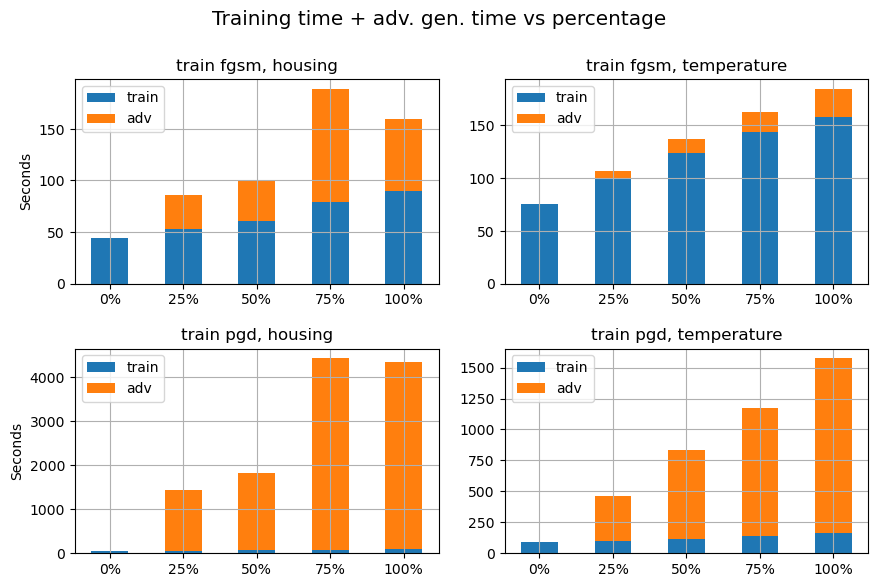

In [5]:
species = ("0%","25%","50%","75%","100%")

weight_counts1 = {"train": np.array(train_times_fgsm_housing),"adv": np.array(adv_times_fgsm_housing)}
weight_counts2 = {"train": np.array(train_times_fgsm_temperature),"adv": np.array(adv_times_fgsm_temperature)}
weight_counts3 = {"train": np.array(train_times_pgd_housing),"adv": np.array(adv_times_pgd_housing)}
weight_counts4 = {"train": np.array(train_times_pgd_temperature),"adv": np.array(adv_times_pgd_temperature)}

width = 0.5

fig, ax = plt.subplots(2,2,figsize=(9, 6), layout='constrained')
bottom = np.zeros(5)

for boolean, weight_count in weight_counts1.items():
    p = ax[0,0].bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax[0,0].grid()
ax[0,0].set_ylabel("Seconds")
ax[0,0].set_title("train fgsm, housing")
ax[0,0].legend()

bottom = np.zeros(5)
for boolean, weight_count in weight_counts2.items():
    p = ax[0,1].bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax[0,1].grid()
ax[0,1].set_title("train fgsm, temperature")
ax[0,1].legend()

bottom = np.zeros(5)
for boolean, weight_count in weight_counts3.items():
    p = ax[1,0].bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax[1,0].grid()
ax[1,0].set_ylabel("Seconds")
ax[1,0].set_title("train pgd, housing")
ax[1,0].legend()

bottom = np.zeros(5)
for boolean, weight_count in weight_counts4.items():
    p = ax[1,1].bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax[1,1].grid()
ax[1,1].set_title("train pgd, temperature")
ax[1,1].legend()

fig.suptitle("Training time + adv. gen. time vs percentage", fontsize='x-large')
fig.tight_layout(pad=1.5)
plt.show()